### Goals for Milestone 2:
<li> Get daily stock closing values </li>
<li> Get daily industry closing values </li>
<li> Get risk free rate data </li>
<li> Convert risk-free rate to daily </li>
<li> Convert to day-over-day return </li>
<li> Visualize time series </li>

### Get libraries

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from fredapi import Fred

### Scenario 1: Tech sector Q1'21

In [4]:
### parameters
### tech stocks and use the S&P500 as market
tickers = ['AAPL','IBM','INTC','MSFT','^GSPC']

### FRED series code for 3-month T-bill
rf_series = 'DGS3MO'

### dates and interval
_start = '2021-01-01'
_end = '2021-04-01'
_fedend = '2021-03-31'
_interval = '1d'

In [5]:
### Download closing prices through API
techstock = yf.download(tickers
                        , start=_start
                        , end=_end
                        , interval=_interval)

### Keep only Close
tech_prices=techstock['Close']

### Rename the troublesome caret
tech_prices=tech_prices.rename({'^GSPC':'GSPC'}, axis='columns')

tech_prices.head(5)

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,IBM,INTC,MSFT,GSPC
Date,,,,,
2021-01-04,129.410004,118.489487,49.669998,217.690002,3700.649902
2021-01-05,131.009995,120.592735,50.610001,217.899994,3726.860107
2021-01-06,126.599998,123.604210,51.099998,212.250000,3748.139893
2021-01-07,130.919998,123.317398,52.189999,218.289993,3803.790039
2021-01-08,132.050003,122.877632,51.650002,219.619995,3824.679932


In [6]:
### Download 3-month T-Bill for same period
### fedkey = 'adfa983hqfja98230982jfa'
fred = Fred(api_key = fedkey)

### Download, dropping nulls
risk_free=fred.get_series(series_id = rf_series).dropna()

### Slice down to the same dates
risk_free=risk_free[_start: _fedend]

In [ ]:
### Plot risk-free rate before and after daily conversion

### Daily conversion
risk_free_daily = risk_free/252

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# 3-month constant treasury
axs[0].plot(risk_free)
axs[0].set_title('3-Month Treasury Constant Maturity Rate')
axs[0].set_ylabel('3-month T-Bill rate%')  # Y-axis label
axs[0].set_xlabel('Date')  # X-axis label
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-ticks

# Daily conversion
axs[1].plot(risk_free_daily)
axs[1].set_title('Daily Conversion')
axs[1].set_ylabel('Rate converted per trading day%')  # Y-axis label
axs[1].set_xlabel('Date')  # X-axis label
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-ticks

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

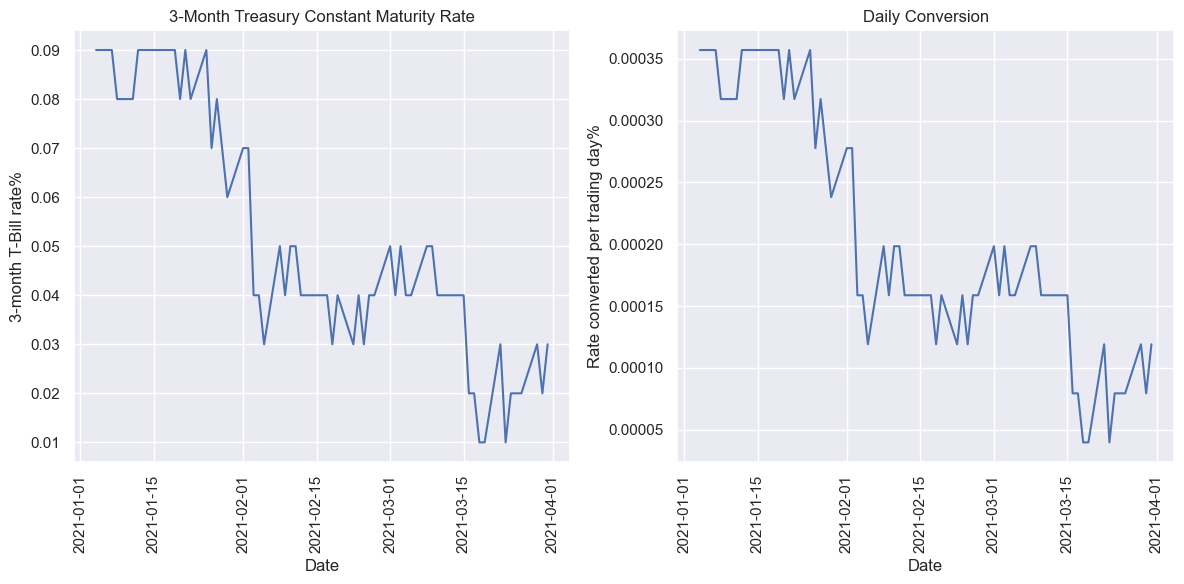

In [7]:
### Taking the daily rate resets the axis values

### Combine stock, market and risk-free into one dataframe

In [8]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 800)

In [9]:
tech_prices.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29', '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05', '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05', '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-29', '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [56]:
### for larger dataframes, use shape
t_rows = tech_prices.shape[0]
r_rows = risk_free_daily.shape[0]
t_earliest, t_latest = tech_prices.index.min(), tech_prices.index.max()
r_earliest, r_latest = risk_free_daily.index.min(), risk_free_daily.index.max()
print("""Tech prices dataframe has %i rows,
and range of dates between %s and %s""" 
      %(t_rows, str(t_earliest), str(t_latest)))
print("""Risk free dataframe has %i rows,
and range of dates between %s and %s"""
      %(r_rows, str(r_earliest), str(r_latest)))

Tech prices dataframe has 61 rows,
and range of dates between 2021-01-04 00:00:00 and 2021-03-31 00:00:00
Risk free dataframe has 61 rows,
and range of dates between 2021-01-04 00:00:00 and 2021-03-31 00:00:00


In [57]:
### Calculate daily returns for tech
tech_returns = tech_prices.pct_change().dropna()
tech_returns.head()

Ticker,AAPL,IBM,INTC,MSFT,GSPC
Date,,,,,
2021-01-05,0.012364,0.017751,0.018925,0.000965,0.007083
2021-01-06,-0.033662,0.024972,0.009682,-0.025929,0.005710
2021-01-07,0.034123,-0.002320,0.021331,0.028457,0.014847
2021-01-08,0.008631,-0.003566,-0.010347,0.006093,0.005492
2021-01-11,-0.023249,0.000389,-0.002130,-0.009699,-0.006555


In [58]:
### Join to rf_daily, which is already daily 'returns'
scen1 = tech_returns.join(risk_free_daily.rename('rf_daily'))
scen1.head()

,AAPL,IBM,INTC,MSFT,GSPC,rf_daily
Date,,,,,,
2021-01-05,0.012364,0.017751,0.018925,0.000965,0.007083,0.000357
2021-01-06,-0.033662,0.024972,0.009682,-0.025929,0.005710,0.000357
2021-01-07,0.034123,-0.002320,0.021331,0.028457,0.014847,0.000357
2021-01-08,0.008631,-0.003566,-0.010347,0.006093,0.005492,0.000317
2021-01-11,-0.023249,0.000389,-0.002130,-0.009699,-0.006555,0.000317


In [59]:
### Calculate excess returns
tech_scen = ["AAPL", "IBM", "MSFT", "INTC", "GSPC"]

### Make a copy
scen1_returns = scen1.copy()

### Append excess returns
for i in tech_scen:
    scen1_returns["xs_rtn_"+str(i)] = scen1_returns[i]
    - scen1_returns['rf_daily']

### See results
scen1_returns[['MSFT','rf_daily','xs_rtn_MSFT']].head()

,MSFT,rf_daily,xs_rtn_MSFT
Date,,,
2021-01-05,0.000965,0.000357,0.000965
2021-01-06,-0.025929,0.000357,-0.025929
2021-01-07,0.028457,0.000357,0.028457
2021-01-08,0.006093,0.000317,0.006093
2021-01-11,-0.009699,0.000317,-0.009699


### Visual analysis

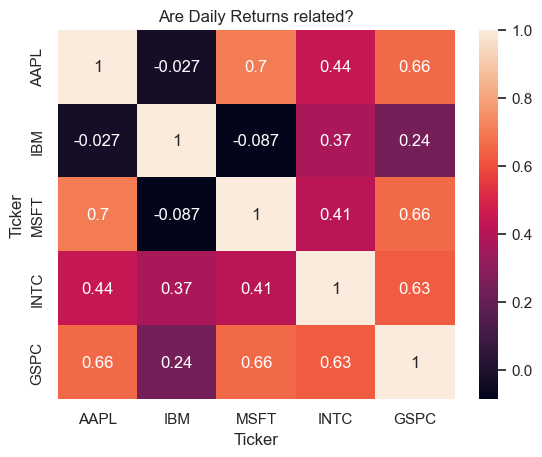

In [71]:
### Do our big four move with the S&P500?
close_price_corr=tech_returns[tech_scen].corr()
sns.heatmap(close_price_corr, annot=True)
plt.title("Are Daily Returns related?")
plt.show()

### Let's build a dual-axis plot to show the individual stocks and the index

In [69]:
### We need only the stocks as a list
tech_prices.columns

Index(['AAPL', 'IBM', 'INTC', 'MSFT', 'GSPC'], dtype='object', name='Ticker')

In [70]:
### Use list comprehension to remove what we do not want
jts = [c for c in tech_prices.columns if c not in('GSPC','rf_daily')]
jts

['AAPL', 'IBM', 'INTC', 'MSFT']

In [ ]:
# the stocks on one axis
plt.figure(figsize=(12,4))
ax1 = sns.lineplot(data=tech_prices[jts])
ax1.legend(loc='center', bbox_to_anchor=(1.2, 1))

# the index on the secondary
ax2 = ax1.twinx()

# Plot the second line on the second y-axis
sns.lineplot(data=tech_prices['GSPC'], color='red', ax=ax2)

# Set labels and titles
ax1.set_ylabel('Tech Stocks Closing', color='blue')
ax2.set_ylabel('S&P500 Closing', color='red')
plt.title("Do closing values track over time?")

# Show the plot
plt.show()

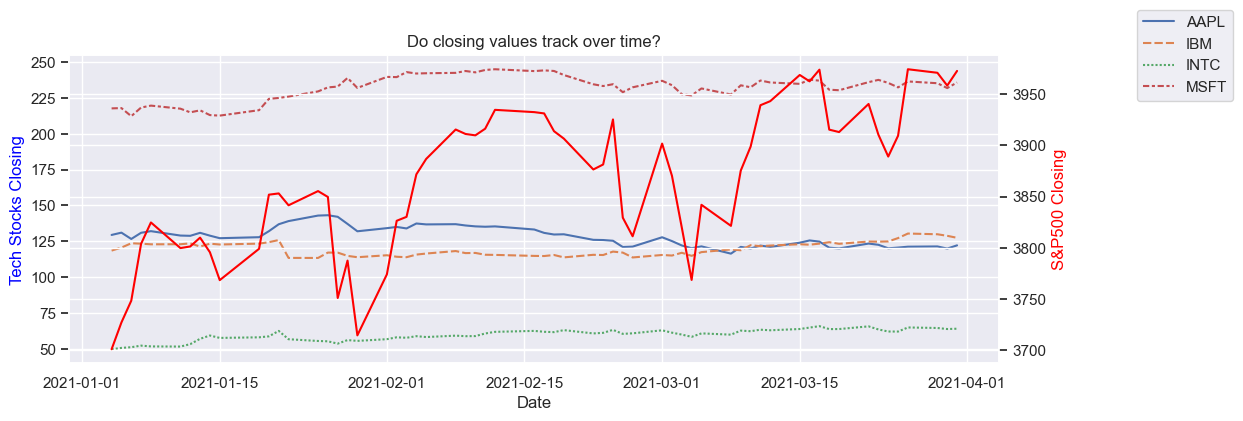

In [86]:
### stocks on left axis, S&P on right axis

### Do the same for excess daily returns

In [74]:
jtr = [c for c in scen1.columns if c not in('rf_daily')]
jtr

['AAPL', 'IBM', 'INTC', 'MSFT', 'GSPC']

In [ ]:
# the stock returns on one axis
plt.figure(figsize=(12,4))
sns.lineplot(data=scen1_returns[jtr])
plt.legend(loc='center', bbox_to_anchor=(1.2, 1))

# Set labels and titles
ax1.set_ylabel('Daily Returns', color='green')
plt.title("Do daily returns track over time?")

# Show the plot
plt.show()

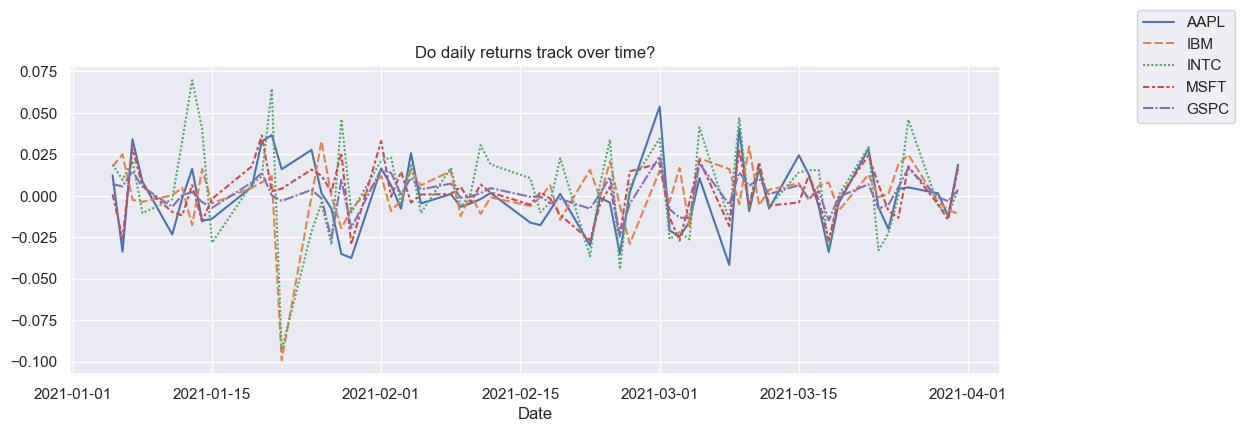

In [75]:
## the daily returns on one axis

## One more scenario?

### Scenario 2: Environmental Services

In [76]:
## Waste management ticker
wm = yf.Ticker("WM")

## What sector are they?
print(wm.info['sector'])

## This is an ETF for that sector
xli = yf.Ticker("XLI")
print(xli.info['longName'])

Industrials
The Industrial Select Sector SPDR Fund


In [77]:
## Look up competitors on a finance website
tickers = ['WM','XLI','RSG','WCN','ROL','RTO','GFL']
_start = '2024-03-11'
_end = '2024-06-11'
_fedend = '2024-06-10'
_interval = '1d'
disp_stocks = yf.download(tickers
                          , start=_start
                          , end=_end
                          , interval=_interval)['Close']

[*********************100%%**********************]  7 of 7 completed


#### Risk-Free rate

In [78]:
### Risk-free we need to re-download
risk_free=fred.get_series(series_id = rf_series).dropna()

### Slice down to the same dates
risk_free=risk_free[_start: _fedend]

### Convert to daily
risk_free_daily = risk_free/252

#### Check for merge

In [79]:
### check that we can merge these
t_rows = disp_stocks.shape[0]
r_rows = risk_free_daily.shape[0]
t_earliest, t_latest = (disp_stocks.index.min()
                        , disp_stocks.index.max())
r_earliest, r_latest = (risk_free_daily.index.min()
                        , risk_free_daily.index.max())
print("""Disposal stocks dataframe has %i rows
, and range of dates between %s and %s"""
      %(t_rows, str(t_earliest), str(t_latest)))
print("""Risk free dataframe has %i rows
, and range of dates between %s and %s"""
      %(r_rows, str(r_earliest), str(r_latest)))

Disposal stocks dataframe has 64 rows
, and range of dates between 2024-03-11 00:00:00 and 2024-06-10 00:00:00
Risk free dataframe has 64 rows
, and range of dates between 2024-03-11 00:00:00 and 2024-06-10 00:00:00


#### Merge and calculate daily change

In [80]:
### calculate daily return for stocks
scen2 = disp_stocks.pct_change().dropna()

### merge with daily 'returns' for risk-free rate
scen2_returns = scen2.join(risk_free_daily.rename('risk_free_daily'))

### Calculate excess returns
for i in tickers:
    scen2_returns["xs_rtn_"+str(i)] = scen2_returns[i] - scen2_returns['risk_free_daily']

In [81]:
### An example for WM and GFL
this_set = [c for c in scen2_returns 
            if c.startswith('WM') or c.startswith('GFL') 
            or c.endswith('WM') or c.endswith('GFL')
            or c == 'risk_free_daily']

scen2_returns[scen2_returns['risk_free_daily']!=0][this_set].head()

,GFL,WM,risk_free_daily,xs_rtn_WM,xs_rtn_GFL
Date,,,,,
2024-03-12,0.002009,0.002437,0.021746,-0.019309,-0.019737
2024-03-13,-0.005441,0.005768,0.021746,-0.015978,-0.027187
2024-03-14,-0.016700,-0.003270,0.021746,-0.025016,-0.038446
2024-03-15,-0.010835,0.001046,0.021746,-0.020700,-0.032581
2024-03-18,0.007401,0.005415,0.021746,-0.016331,-0.014345


#### Generate Scenario 2 heat map

In [82]:
daily_list = [c for c in scen2_returns if c.startswith('xs_rtn')]

In [ ]:
# Create the figure and two side-by-side axes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Adjust as needed

# Create heatmaps
close_price_corr=disp_stocks[tickers].corr()
daily_return_corr = scen2_returns[daily_list].corr()

# Plot closing price on left subplot
sns.heatmap(close_price_corr, annot=True, ax=axs[0])  # Plot left
axs[0].set_title('Closing Price')  # Set the title for left

# Plot daily return on right subplot
sns.heatmap(daily_return_corr, annot=True, ax=axs[1])  # Plot right
axs[1].set_title('Excess Daily Return')  # Set the title for right

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

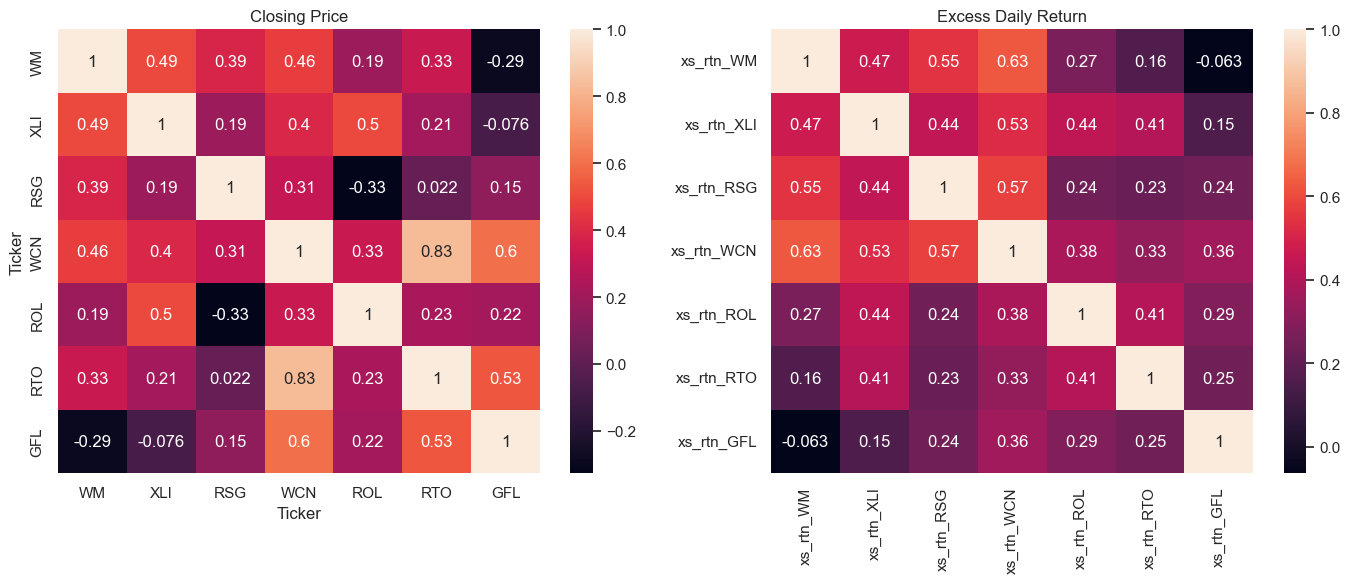

In [85]:
## Closing price on left, excess daily return on right

### Dual - line plot

In [87]:
disp_stock_list = [c for c in daily_list if c != 'xs_rtn_XLI']

In [ ]:
# the stock returns on one axis
plt.figure(figsize=(12,4))
ax1 = sns.lineplot(data=scen2_returns[disp_stock_list])
ax1.legend(loc='center', bbox_to_anchor=(1.2, 1))

# the index on the secondary
ax2 = ax1.twinx()

# Plot the second line on the second y-axis
sns.lineplot(data=scen2_returns['xs_rtn_XLI'], color='red', ax=ax2)

# Set labels and titles
ax1.set_ylabel('Disposal Stocks Excess Daily Returns', color='blue')
ax2.set_ylabel('XLI Excess Daily Returns', color='red')
plt.title("Do daily returns track over time?")

# Show the plot
plt.show()

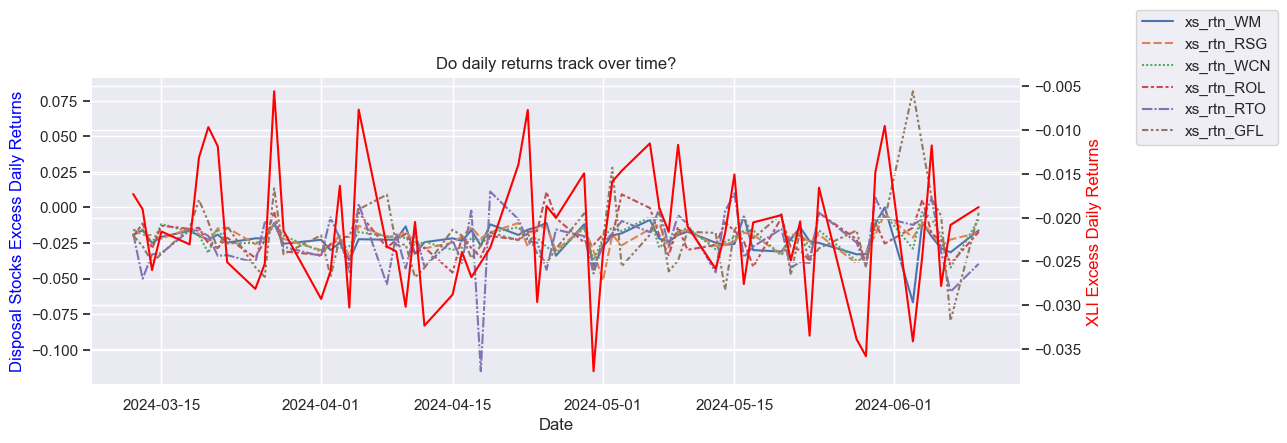

In [88]:
# dual-line plot for scenario 2: disposal stocks against ETF

### Now we have:
<li> Risk-free rate </li>
<li> Market return and excess return </li>
<li> Asset return and excess return </li>

## In the next video we will calculate:
<li> Beta, the asset's sensitivity to market returns </li>
<li> The expected return using CAPM </li>